In [1]:
from blackhc.mdp import dsl
from blackhc import mdp

In [3]:
def  _multi_round_nmdp():
    with dsl.new() as mdp:
        # Write down the MDP dynamics here 
        
        start = dsl.state()
        S_1=dsl.state()
        end = dsl.terminal_state()
        
        A_0=dsl.action()
        A_1=dsl.action()

        start & A_0 > dsl.reward(5) | dsl.reward(-2)
        start & A_0 > start * 3 | S_1
        start & A_1 > dsl.reward(6) | dsl.reward(8)
        start & A_1 > S_1 * 1 | end
        
        S_1 & A_0 > dsl.reward(5) | dsl.reward(-2)
        S_1 & A_0 > S_1 * 3 | start
        S_1 & A_1 > dsl.reward(6) | dsl.reward(8)
        S_1 & A_1 > start * 1 | end
        
        

        dsl.discount(0.5)

        return mdp.validate()

In [4]:
MULTI_ROUND_NDMP = _multi_round_nmdp()
mdp.display_mdp(MULTI_ROUND_NDMP)

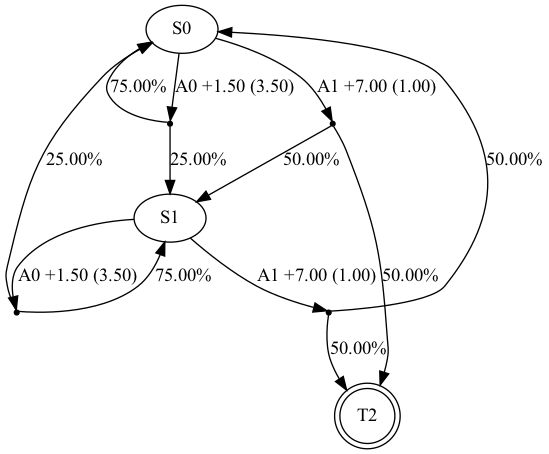

In [5]:
from matplotlib import pyplot
import time 

env = MULTI_ROUND_NDMP.to_env()


def display_env():    
    env.render()
    env.render_widget.width=500
    time.sleep(0.200)
    
    
for _ in range(3):
    
    env.reset()
    display_env()

    while True:
        state, reward, is_done, _ = env.step(env.action_space.sample())
        display_env()

        if is_done:
            break


Image(value=b'')

In [6]:
env.reset()
print(env._state)
env.reset()
print(env._state)
env.reset()
print(env._state)
env.reset()
print(env._state)



State(S0, 0, False)
State(S0, 0, False)
State(T2, 2, True)
State(T2, 2, True)


In [32]:
import numpy as np
np.random.choice(env.mdp.states,p=[1/3,1/3,1/3])

State(S1, 1, False)

In [22]:
env.mdp.states

[State(S0, 0, False), State(S1, 1, False), State(T2, 2, True)]

In [23]:
env.observation_space.n, env.action_space

(3, Discrete(2))

In [20]:
env.action_space.n

2